# ABSA Task

Restaurant Review Dataset

TODO: 
1. Learn Aspects
2. Find Aspects in Sentencens
3. Find Polarity for each Aspect

Model: 
a. Aspect Category Classifier
b. Sentiment Model

In [128]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

# Tokanization

### Sentence tokanziation

In [75]:
text = """hello, my name is Nora. I hope I will soon be able to classify text. The weather is brilliant today. Corona is everywhere. I just want to go outside and do stuff. But I still do  but allone. But in generall people shouldn't go outside. once corona is over we can for sure go outside again. """

In [76]:
tokenized_sent = sent_tokenize(text)
print(tokenized_sent)

['hello, my name is Nora.', 'I hope I will soon be able to classify text.', 'The weather is brilliant today.', 'Corona is everywhere.', 'I just want to go outside and do stuff.', 'But I still do  but allone.', "But in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.']


### Word tokanization

In [77]:
tokenized_word = word_tokenize(text)
print(tokenized_word)

['hello', ',', 'my', 'name', 'is', 'Nora', '.', 'I', 'hope', 'I', 'will', 'soon', 'be', 'able', 'to', 'classify', 'text', '.', 'The', 'weather', 'is', 'brilliant', 'today', '.', 'Corona', 'is', 'everywhere', '.', 'I', 'just', 'want', 'to', 'go', 'outside', 'and', 'do', 'stuff', '.', 'But', 'I', 'still', 'do', 'but', 'allone', '.', 'But', 'in', 'generall', 'people', 'should', "n't", 'go', 'outside', '.', 'once', 'corona', 'is', 'over', 'we', 'can', 'for', 'sure', 'go', 'outside', 'again', '.']


### Frequency Distribution

In [78]:
fqdistr = FreqDist(tokenized_word)
print(fqdistr)

<FreqDist with 46 samples and 66 outcomes>


In [79]:
fqdistr.most_common(5)

[('.', 8), ('is', 4), ('I', 4), ('go', 3), ('outside', 3)]

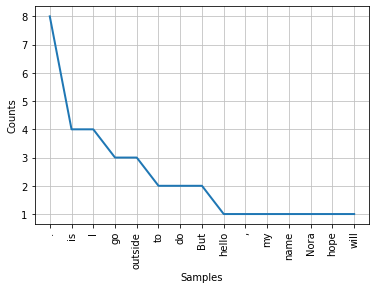

In [80]:
fqdistr.plot(15, cumulative=False)
plt.show()

## Stopwords

In [81]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
print(stop_words)

{'once', 'over', 'which', 'doesn', 've', 'she', 'be', 'but', 'through', 'these', 'so', 'am', 'the', "won't", 'as', 'further', 'until', 'themselves', 'hers', 'is', 'have', 'ourselves', 'from', 'off', 'such', 'only', 'an', 'our', "you're", 'about', 'were', 'a', 'or', 'their', 'and', 'are', 'you', "shan't", 'd', 'had', 'no', 'how', 'yourselves', 'up', 'having', 'than', 'does', 'will', 'm', 'down', 'very', 'i', "wouldn't", 'above', 'couldn', 'should', 'below', 'don', 'him', 'out', 'more', 'ma', "aren't", 'has', 'theirs', 'itself', 'in', "you'd", 'other', 'o', 'while', 'on', 's', 'me', 'now', "doesn't", "should've", 'doing', 'wouldn', 'them', 'it', 'mightn', 'her', 'yourself', 'by', 'after', "couldn't", 'when', 're', "mustn't", "shouldn't", "you'll", 'not', 'he', 'this', 'whom', 'before', "mightn't", 't', 'during', 'yours', 'if', "wasn't", 'too', 'because', 'myself', "that'll", 'ain', 'then', 'for', 'won', 'we', 'ours', "you've", "she's", 'did', 'hasn', 'mustn', 'into', 'that', "weren't", '

[nltk_data] Downloading package stopwords to /home/nora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Filter Stopwords 

In [82]:
filtered_sent = []
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent, "\n")
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['hello, my name is Nora.', 'I hope I will soon be able to classify text.', 'The weather is brilliant today.', 'Corona is everywhere.', 'I just want to go outside and do stuff.', 'But I still do  but allone.', "But in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.'] 

Filterd Sentence: ['hello, my name is Nora.', 'I hope I will soon be able to classify text.', 'The weather is brilliant today.', 'Corona is everywhere.', 'I just want to go outside and do stuff.', 'But I still do  but allone.', "But in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.']


In [83]:
fqdistr = FreqDist(filtered_sent)
print(fqdistr)

<FreqDist with 8 samples and 8 outcomes>


### Stemming - linguistic normalization

In [86]:
ps = PorterStemmer ()

In [90]:
stemmed_words = []
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Sentence:",filtered_sent, "\n")
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['hello, my name is Nora.', 'I hope I will soon be able to classify text.', 'The weather is brilliant today.', 'Corona is everywhere.', 'I just want to go outside and do stuff.', 'But I still do  but allone.', "But in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.'] 

Stemmed Sentence: ['hello, my name is nora.', 'i hope i will soon be able to classify text.', 'the weather is brilliant today.', 'corona is everywhere.', 'i just want to go outside and do stuff.', 'but i still do  but allone.', "but in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.']


# Text Classification

## 1. Dataset

Sentiment Analysis of Movie Reivews form Kaggle
Columns:
1. PhraseId
2. SentenceId
3. Phrase
4. Sentiment

5 Sentiment Labels: 0 - negative to 4 - positive

In [101]:
# load datase
data = pd.read_csv('train.tsv', sep='\t')

In [94]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [97]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

#### Data Vizualizations

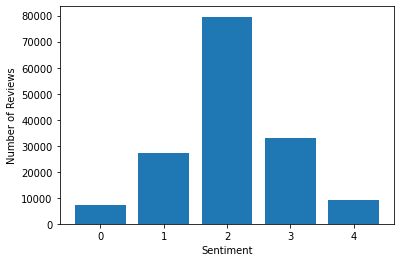

In [104]:
sentiment_count = data.groupby('Sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['Phrase'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

## 2. Feature Generation
### 2.1 Bag of Words

In [106]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [122]:
print(text_counts[:1])

  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1


In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [117]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Accuracy:  0.6049169122986885


### 2.2 Term Frequency - Inverse Document Frequency
The problem with BOW, where we count the number of words in each document (term frequency) is that longer sentences will have more weight to longer documents. 

Inverse Document Frequency measures the amount of information a word provides in the document. log scaled inverse ration of the number of documents that contain the word ant the toal number of documents.

In [120]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Phrase'])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=1)

In [126]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Accuracy:  0.5853090691614337


### 2.3 Logistic Regression Sklearn

In [136]:
!export CUDA_VISIBLE_DEVICES=3


clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)


print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Accuracy:  0.6294160365671323


/mnt/sdb1/nora/git/ma/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
